In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
import pandas as pd
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [92]:
# There are no null values.

In [93]:
df.duplicated().sum()

1

In [94]:
df.drop_duplicates(inplace=True)

In [95]:
df.duplicated().sum()

0

# Lets start with EDA(Exploratory Data Analysis)

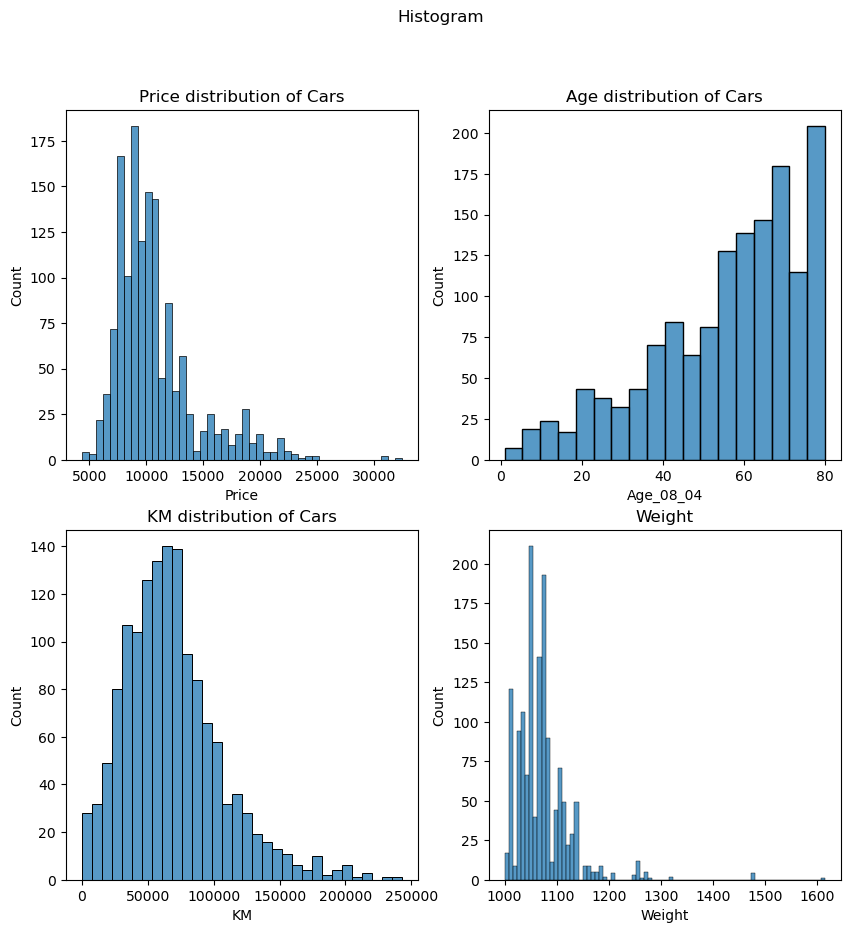

In [97]:
fig, axes  =plt.subplots(2,2,figsize=(10,10))
sns.histplot(df['Price'],ax=axes[0,0])
axes[0,0].set_title('Price distribution of Cars')

sns.histplot(df['Age_08_04'],ax=axes[0,1])
axes[0,1].set_title('Age distribution of Cars')

sns.histplot(df['KM'],ax=axes[1,0])
axes[1,0].set_title('KM distribution of Cars')

sns.histplot(df['Weight'],ax=axes[1,1])
axes[1,1].set_title('Weight')

plt.suptitle('Histogram')
plt.show()

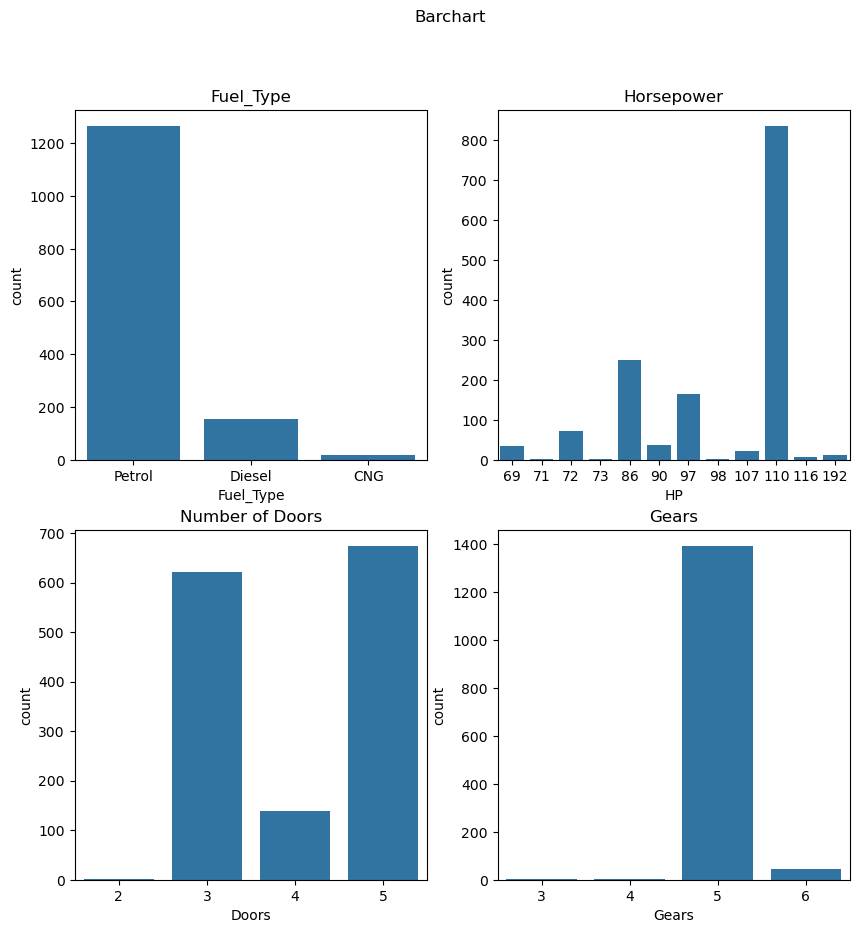

In [98]:
fig, axes  =plt.subplots(2,2,figsize=(10,10))
sns.barplot(df['Fuel_Type'].value_counts(),ax=axes[0,0])
axes[0,0].set_title('Fuel_Type')

sns.barplot(df['HP'].value_counts(),ax=axes[0,1])
axes[0,1].set_title('Horsepower')

sns.barplot(df['Doors'].value_counts(),ax=axes[1,0])
axes[1,0].set_title('Number of Doors')

sns.barplot(df['Gears'].value_counts(),ax=axes[1,1])
axes[1,1].set_title('Gears')

plt.suptitle('Barchart')
plt.show()

Looks like the Cylinders column contains same information. Hence we can drop that column.

In [108]:
df.drop(columns= 'Cylinders',inplace=True)
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


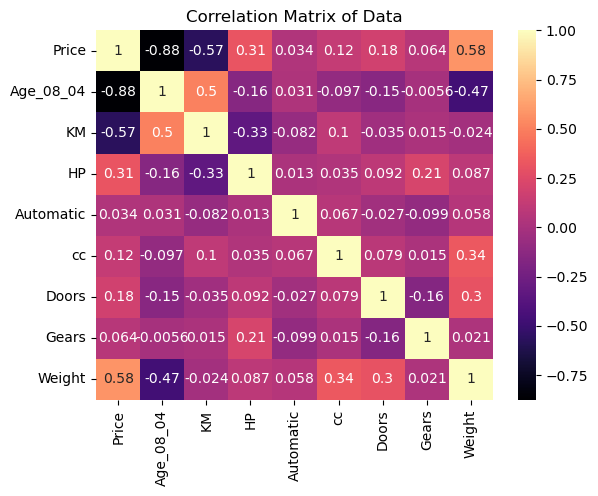

In [109]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap = 'magma')
plt.title('Correlation Matrix of Data')
plt.show()

We can see that age and Kilometers are negative correlated with price as the age and kilometers of the car increases its value(price) decreases. Horsepower is positively correlated which makes sense cause horsepower determines the power of the car which increases its price.

In [111]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [112]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()
df_encoded = df.copy()
df_encoded['Fuel_Type'] = le.fit_transform(df_encoded['Fuel_Type'])
sc = StandardScaler()
df_encoded[['Age_08_04','KM','cc','HP','Weight']] = sc.fit_transform(df_encoded[['Age_08_04','KM','cc','HP','Weight',]])
df_encoded

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,-1.777268,-0.575958,1,-0.767351,0,0.998113,3,5,1.774964
1,13750,-1.777268,0.116474,1,-0.767351,0,0.998113,3,5,1.774964
2,13950,-1.723380,-0.716707,1,-0.767351,0,0.998113,3,5,1.774964
3,14950,-1.615603,-0.548902,1,-0.767351,0,0.998113,3,5,1.774964
4,13750,-1.400049,-0.802384,1,-0.767351,0,0.998113,3,5,1.870688
...,...,...,...,...,...,...,...,...,...,...
1431,7500,0.701602,-1.281492,2,-1.034441,0,-0.651898,3,5,-0.905299
1432,10845,0.863267,-1.322689,2,-1.034441,0,-0.651898,3,5,-1.096747
1433,8500,0.809379,-1.375627,2,-1.034441,0,-0.651898,3,5,-1.096747
1434,7250,0.755490,-1.378295,2,-1.034441,0,-0.651898,3,5,-1.096747


In [113]:
X = df_encoded.drop(columns = 'Price')
y = df_encoded['Price']

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 9)
(287, 9)
(1148,)
(287,)


In [116]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_test_pred)

0.0968237151586731

In [118]:
df1 = df_encoded.copy()

In [119]:
df1['Predicted'] = model.predict(df1.drop(columns='Price'))

In [132]:
import joblib
joblib.dump(sc,'Scaler.pkl')
joblib.dump(model,'Model.pkl')

['Model.pkl']